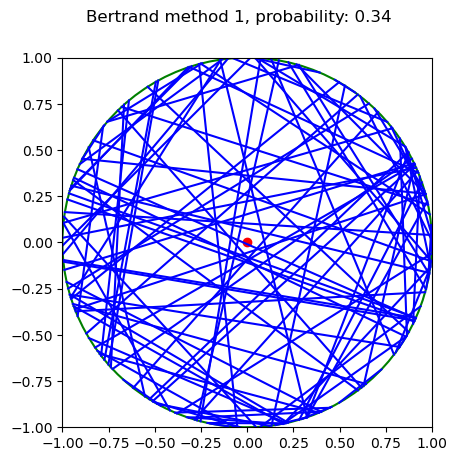

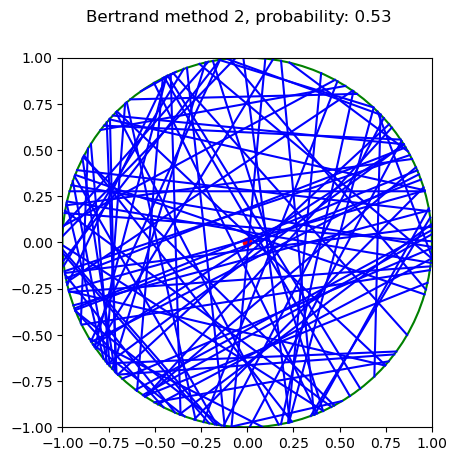

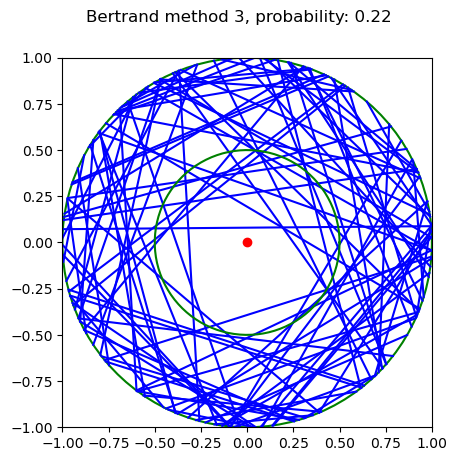

In [2]:
import numpy as np
import matplotlib.pyplot as plt


CHORDS_NUMBER = 100
RADIUS = 1
TRIANGLE_SIDE_LENGTH = RADIUS * np.sqrt(3)
RADIUS_OF_INSCRIBED_CIRCLE = TRIANGLE_SIDE_LENGTH * np.sqrt(3) / 6


def show_circle():
    # the origin
    plt.plot(0, 0, color="red", marker="o")

    # properties
    plt.xlim(-RADIUS, RADIUS)
    plt.ylim(-RADIUS, RADIUS)
    plt.gca().set_aspect("equal")

    # drawing a circle
    angles = np.linspace(0, 2 * np.pi, 100)
    plt.plot(RADIUS * np.cos(angles), RADIUS * np.sin(angles), color="green")


def show_inscribed_circle():
    angles = np.linspace(0, 2 * np.pi, 100)
    plt.plot(RADIUS_OF_INSCRIBED_CIRCLE * np.cos(angles), RADIUS_OF_INSCRIBED_CIRCLE * np.sin(angles), color="green")


def get_chord_length(chord):
    return np.sqrt((chord[0][0] - chord[0][1]) ** 2 + (chord[1][0] - chord[1][1]) ** 2)


"""
m(slope) = -x0 / y0
c(free term) = y0 + x0 ** 2 / y0
x ^ 2 + y ^ 2 = r ^ 2 (circle equation)
y = m * x + c (line equation)
x ^ 2 + (m * x + c) ^ 2 - r ^ 2 = 0
(m ^ 2 + 1) * x ^ 2 + 2 * m * c * x + c ^ 2 - r ^ 2 = 0
"""
def get_chords_from_midpoints(midpoints):
    chords = np.empty((CHORDS_NUMBER, 2, 2))
    for i, (x0, y0) in enumerate(midpoints.T):
        m = -x0 / y0
        c = y0 + x0 ** 2 / y0
        A = m ** 2 + 1
        B = 2 * m * c
        C = c ** 2 - RADIUS ** 2
        d = np.sqrt(B ** 2 - 4 * A * C)
        x = np.array(((-B + d), (-B - d))) / (2 * A)
        y = m * x + c
        chords[i] = (x, y)
    return chords


def draw_figure(chords, method):
    # create a new figure
    fig = plt.figure()
    show_circle()

    # count how many chords are longer that the side of the triangle
    successes = [False] * CHORDS_NUMBER

    # check the length and draw the chord
    for i, chord in enumerate(chords):
        if get_chord_length(chord) > TRIANGLE_SIDE_LENGTH:
            successes[i] = True
        plt.plot(chord[0], chord[1], color="blue")

    # get the probability
    prob = np.sum(successes) / CHORDS_NUMBER
    fig.suptitle(f"Bertrand method {method}, probability: {prob}")


"""
Generate random points on the unit circle
"""
def bertrand_1():
    # angles between 0 and 2PI
    angles = np.random.random((CHORDS_NUMBER, 2)) * 2 * np.pi

    # random coordinates of points on the circle, x coordinates and y coordinates
    chords = np.array((RADIUS * np.cos(angles), RADIUS * np.sin(angles)))

    # group them with 2 x coordinates and 2 y coordinates, [[x0 x1][y0 y1]]
    chords = np.swapaxes(chords, 0, 1)

    draw_figure(chords, 1)


"""
Select random radius of the circle and then random points on this radius such that
they are midpoints
"""
def bertrand_2():
    angles = np.random.random(CHORDS_NUMBER) * 2 * np.pi
    radii = np.random.random(CHORDS_NUMBER) * RADIUS
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)

    draw_figure(chords, 2)


"""
Select a random point within the circle and choose it to be the midpoint of a chord
"""
def bertrand_3():
    angles = np.random.random(CHORDS_NUMBER) * 2 * np.pi
    radii = np.sqrt(np.random.random(CHORDS_NUMBER)) * RADIUS
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)

    draw_figure(chords, 3)
    show_inscribed_circle()


def solve():
    bertrand_1()
    bertrand_2()
    bertrand_3()


solve()